# Домашнее задание по статистическому анализу на python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

Загрузить датасет по url:


In [68]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

World happiness gauged by technologies, social norms, and government policies. Dataset created by PromptCloud's web crawling solution.


*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [58]:
df.head(5)


,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

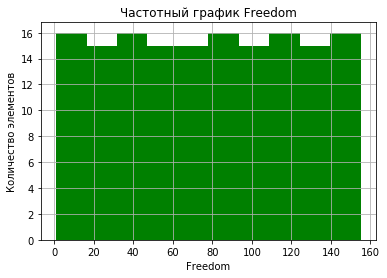

Распределение похоже на равномерное


In [59]:
freedom_hist = plt.hist(df['Freedom'], 10, facecolor='g')
plt.xlabel('Freedom')
plt.ylabel('Количество элементов')
plt.title('Частотный график Freedom')
plt.grid(True)
plt.show()
print('Распределение похоже на равномерное')

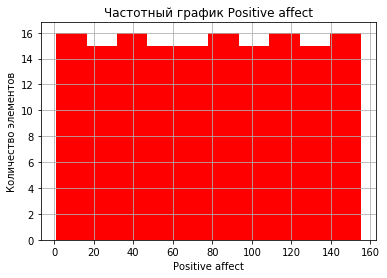

Распределение похоже на равномерное


In [60]:
pa_hist = plt.hist(df['Positive affect'], 10, facecolor='r')
plt.xlabel('Positive affect')
plt.ylabel('Количество элементов')
plt.title('Частотный график Positive affect')
plt.grid(True)
plt.show()
print('Распределение похоже на равномерное')

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [92]:
print('Количество выбросов: ', df['Freedom'].isnull().sum())

Количество выбросов:  1


In [93]:
filt_df = df.dropna()
print('Количество выбросов: ', filt_df['Freedom'].isnull().sum())
print('Медиана: ', statistics.median(df['Freedom']))
try: 
    statistics.mode(df['Freedom'])
except:
    print ('Мода не определена, так как повторяющиеся значения не найдены')
print('Минимальное значение: ', min(df['Freedom']))
print('Максимальное значение: ', max(df['Freedom']))
print('Размах: ', max(df['Freedom'])-min(df['Freedom']))
print('Математическое ожидание/Среднее значение: ', statistics.mean(filt_df['Freedom']))
print('Стандартное отклонение: ', statistics.pstdev(filt_df['Freedom']))
print('Дисперсия: ', statistics.pvariance(filt_df['Freedom']))

Количество выбросов:  0
Медиана:  71.0
Мода не определена, так как повторяющиеся значения не найдены
Минимальное значение:  1.0
Максимальное значение:  155.0
Размах:  154.0
Математическое ожидание/Среднее значение:  78.82857142857142
Стандартное отклонение:  44.9475794449399
Дисперсия:  2020.2848979591836


Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

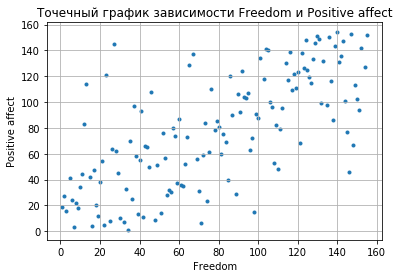

Коэффициент Пирсона 0.6965670458090686
Можно говорить о заметной корреляции


In [116]:
from scipy.stats import pearsonr
freedom = filt_df['Freedom']
p_affect = filt_df['Positive affect']
plt.xlabel('Freedom')
plt.ylabel('Positive affect')
plt.title('Точечный график зависимости Freedom и Positive affect')
plt.grid(True)
plt.scatter(freedom, p_affect, marker='.')
plt.show()
corr, p_value = pearsonr(freedom, p_affect)
print('Коэффициент Пирсона', corr)
print('Можно говорить о заметной корреляции')

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [95]:
freedom_1 = freedom - statistics.mean(freedom)

from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
freedom_2 = min_max_scaler.fit_transform(np.array(freedom_1).reshape(-1, 1))

Построить матрицу корреляций для всех колонок таблицы

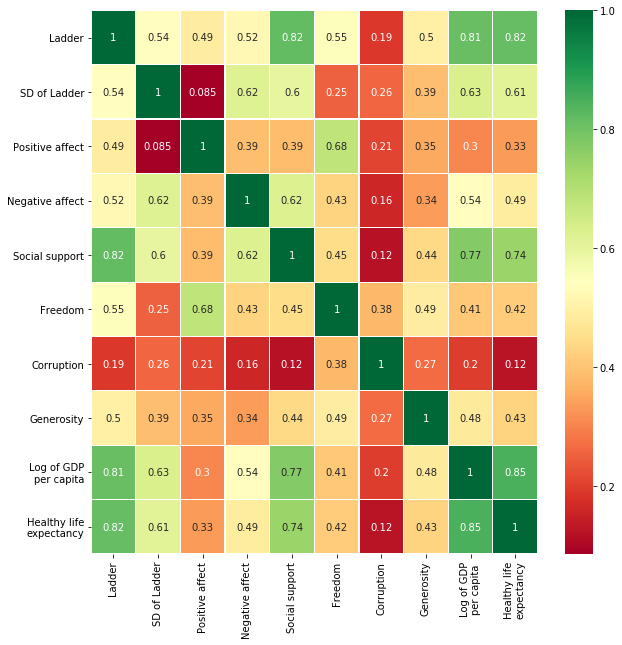

In [98]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

Загрузить следующую таблицу: 

In [120]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)
df[:10]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

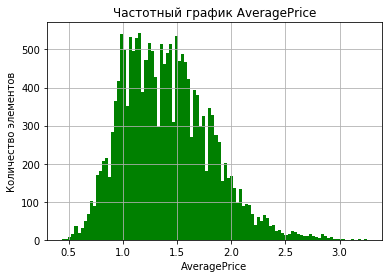

Распределение похоже на нормальное


In [102]:
avg_price_hist = plt.hist(df['AveragePrice'], 100, facecolor='g')
plt.xlabel('AveragePrice')
plt.ylabel('Количество элементов')
plt.title('Частотный график AveragePrice')
plt.grid(True)
plt.show()
print('Распределение похоже на нормальное')

Найти корреляцию в следующих колонках:

Корелляция между: 4046 - Total number of avocados with PLU 4046 sold  и например Average Price. Если корелляция есть, то скорее всего, данный вид авокадо дорогой по цене и он влияет на среднюю стоимость.

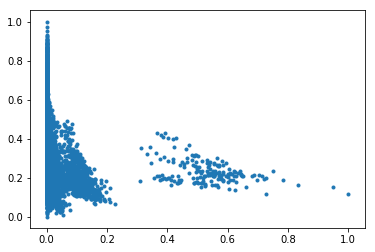

Корреляция Пирсона:  -0.2083170484878848
Авокадо 4046 не является дорогим и не влияет на среднюю стоимость


In [122]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
np_scaled = min_max_scaler.fit_transform(df[['4046', 'AveragePrice']])
df_norm = pd.DataFrame(np_scaled)
plu4046 = df_norm[0]
avg_price = df_norm[1]
plt.scatter(plu4046, avg_price, marker='.')
plt.show()
corr, p_value = pearsonr(plu4046, avg_price)
print('Корреляция Пирсона: ', corr)
print ('Авокадо 4046 не является дорогим и не влияет на среднюю стоимость')